# Принятие решений в бизнесе на основе данных

В нашем распоряжении данные крупного интернет-магазина:
Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Нам предстоит:
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## План работ по принятию решений в бизнесе на основе данных

<div class="alert alert-info" role="alert">
Нам представлены данные крупного интернет-магазина. 
    
Данные представляют собой 3 датасета с информацией о гипотезах, заказах и группами A/B-теста.
    
   
Данные первой части с информацией о гипотезах содержат:
    
— краткое описание гипотезы;
    
— охват пользователей по 10-балльной шкале;
    
— влияние на пользователей по 10-балльной шкале;
    
— уверенность в гипотезе по 10-балльной шкале;
    
— затраты ресурсов на проверку гипотезы по 10-балльной шкале.

    
Данные для второй части содержат следующую информацию:
    
Информацию о заказах:

— идентификатор заказа;
    
— идентификатор пользователя, совершившего заказ;
    
— дата, когда был совершён заказ;
    
— выручка заказа;
    
— группа A/B-теста, в которую попал заказ.
    
Информацию о посетителях:
    
— дата;
    
— группа A/B-теста;
    
— количество пользователей в указанную дату в указанной группе A/B-теста.
     
    
Шаг 1. Откроем файлы с данными и изучим общую информацию.  

        
Шаг 2. Приоритизация гипотез.
    
Применим фреймворк ICE для приоритизации гипотез.
    
Применим фреймворк RICE для приоритизации гипотез.
    
Определим приоритетные гипотезы.
  
    
    
Шаг 3. Проанализируем A/B-тест и построим графики:
    
Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
    
Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
    
Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
    
Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.
    
Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.
    
Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
    
Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
    
Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
    
Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
    
Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.
    
Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
    
Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.
    
Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
    
Примем решение по результатам теста:
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.    
    
    
Шаг 4. Сформулируем выводы и рекомендации    

</div>

# Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Данные для первой части

In [2]:
df_hypothesis = pd.read_csv('/datasets/hypothesis.csv') 
df_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
pd.set_option('max_colwidth', -1)
df_hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В нашем распоряжнии имеется 9 гипотез, в компании принята шкала линейной оценки гипотезы от 0 до 10, где 0 — «охват гипотезы ни на кого не повлияет», а 10 — «гипотеза охватит хотя бы половину пользователей».
Параметр Reach - охват пользователей максимален для гипотез 2, 3 и 7.
Параметр Impact - сильно изменение повлияет на пользователей гипотез 0, 7 и 8.
Параметр Confidence - максимальная уверенность в оценках других параметров для гипотез 0, 2, 6, 7 и 8.
Параметр Efforts - максимально сложно будет проверить гипотезы 1 и 3

### Данные второй части

In [4]:
df_orders = pd.read_csv('/datasets/orders.csv') 
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
df_orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Столбцу со временем date присвоим тип дата

In [6]:
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [7]:
df_visitors = pd.read_csv('/datasets/visitors.csv') 
df_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
df_visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Столбцу со временем date присвоим тип дата

In [9]:
df_visitors['date'] = pd.to_datetime(df_visitors['date'])
df_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


# Шаг 2. Приоритизация гипотез

ICE и RICE — один из самых популярных способов приоритизации задач:
Фреймворк RICE состоит из четырёх компонент:
Reach — скольких пользователей затронет изменение, которое мы хотите внести;
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — насколько мы уверены, что это изменение повлияет на пользователей именно так;
Efforts — сколько стоит протестировать эту гипотезу.

### Применим фреймворк ICE для приоритизации гипотез


Определим приоритетные гипотезы методом ICE 

In [10]:
df_hypothesis['ICE'] = (df_hypothesis.Impact * df_hypothesis.Confidence) / df_hypothesis.Efforts
df_hypothesis_ICE = df_hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
df_hypothesis_ICE.round(1)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Наиболее приоритетными гипотезами являются 8, 0 и 7. Приоритет данных гипотез оптимален в соотношении параметров влияния, уверенности и затрат.

### Применим фреймворк RICE для приоритизации гипотез

Определим приоритетные гипотезы методом RICE 

In [11]:
df_hypothesis['RICE'] = (df_hypothesis.Reach * df_hypothesis.Impact * df_hypothesis.Confidence) / df_hypothesis.Efforts
df_hypothesis_RICE = df_hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
df_hypothesis_RICE

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее приоритетными гипотезами являются 7, 2, 0 и 6. Приоритет данных гипотез оптимален в соотношении параметров охвата, влияния, уверенности и затрат

Вывод: При определении перспективных гипотез методом ICE наиболее приоритетными гипотезами оказались 8, 0 и 7, при определении перспективных гипотез методом RICE наиболее приоритетными гипотезами оказались 7, 2, 0 и 6. Пипотезы 0 и 7 оказались в обоих списках, гипотеза 7 стала лидером списка RICE, а гипотеза 8 пропала из него, потому что параметр Reach (охват) у первой максимален, у второй минимален.
С учетом охвата аудитории приоритет проверки гипотез следует рассатривать в следующем порядке:

Гипотеза 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Гипотеза 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	

Гипотеза 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	

Гипотеза 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

# Шаг 3. Проанализируем A/B-тест и построим графики

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. Избавимся от дубликатов
Создадим переменную ordersAggregated с датой; группой A/B-теста; числом уникальных заказов в группе теста по указанную дату включительно; числом уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно и 
суммарной выручкой заказов в группе теста по указанную дату включительно

In [12]:
datesGroups = df_orders[['date','group']].drop_duplicates() 
ordersAggregated = datesGroups.apply(
    lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 
#ordersAggregated

Создадим переменную visitorsAggregated, содержащую: дату; группу A/B-теста;количество уникальных посетителей в группе теста по указанную дату включительно.
ordersAggregated и visitorsAggregated отсортируем по столбцам 'date', 'group' 

In [13]:
visitorsAggregated = datesGroups.apply(
    lambda x: df_visitors[np.logical_and(df_visitors['date'] <= x['date'], df_visitors['group'] == x['group'])].agg({
        'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

#visitorsAggregated

Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge()
Присвоиме столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [14]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B

In [15]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
#cumulativeRevenueA
#cumulativeRevenueB

Построим графики кумулятивной выручки по дням по группам

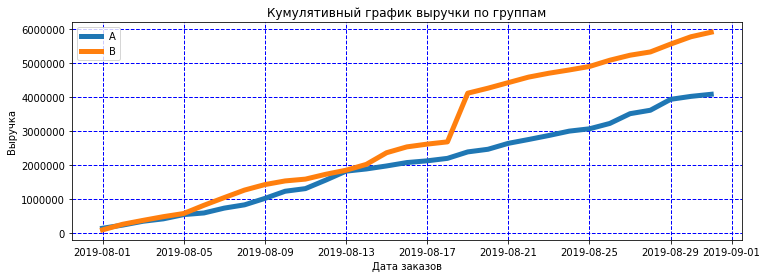

In [16]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.subplots(figsize=(12, 4))
plt.title('Кумулятивный график выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата заказов')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', linewidth = 5)
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', linewidth = 5)
plt.grid(color = 'blue', linewidth = 1, linestyle = '--')
plt.legend();

С самого начала теста сегмент В шел немного впереди а с середины резко вырвался вперед. Похоже, что аномально большие заказы влияют на результаты

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

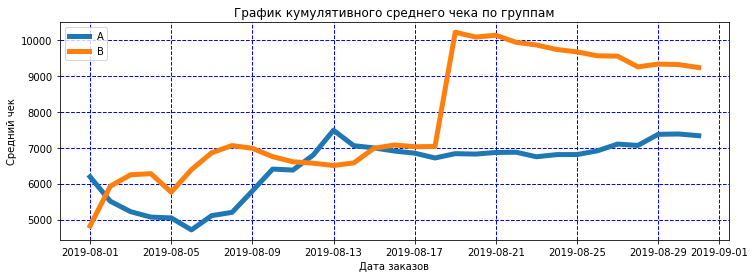

In [17]:
plt.subplots(figsize=(12, 4))
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата заказов')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', linewidth = 5)
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', linewidth = 5)
plt.grid(color = 'blue', linewidth = 1, linestyle = '--')
plt.legend(loc='upper left');

Средний чек тоже становится равномерным ближе к концу теста: для группы A немного возрастает и для группы B немного падает. Возможно, в группу B в первой половине теста попали крупные заказы (резкий всплеск на графике). Скорее всего принимать решение по этой метрике рано. Требуется дополнительный анализ выбросов, который искажает результаты

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения

Объединим таблицы cumulativeRevenueA и cumulativeRevenueB методом merge()

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Построим график относительно различия кумулятивного среднего чека группы B к группе A

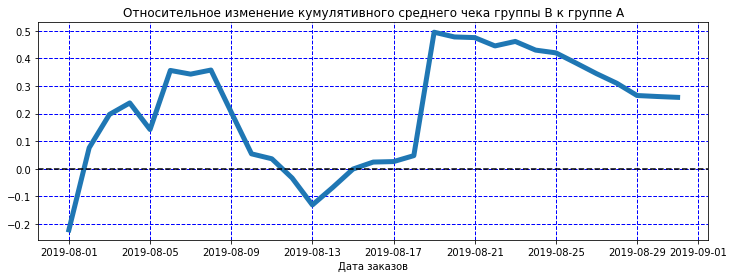

In [19]:
plt.subplots(figsize=(12, 4))
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата заказов')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, linewidth = 5)
plt.grid(color = 'blue', linewidth = 1, linestyle = '--')
plt.axhline(y=0, color='black', linestyle='--');

Результаты теста значительно и резко менялись несколько раз. Возможно, тогда были совершены аномальные заказы.

### Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения

Добавим в cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.
Объявитм переменные cumulativeDataA и cumulativeDataB, в которых сохраните данные о заказах в сегментах A и B соответственно

In [20]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


Построим графики кумулятивной конверсии по дням по группам

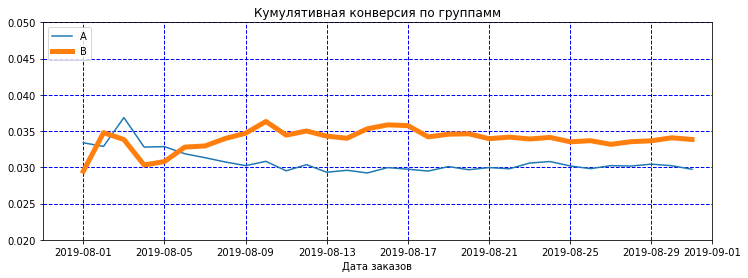

In [21]:
plt.subplots(figsize=(12, 4))
plt.title('Кумулятивная конверсия по группамм')
plt.xlabel('Дата заказов')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', linewidth = 5)
plt.legend(loc='upper left')
plt.grid(color = 'blue', linewidth = 1, linestyle = '--')
plt.axis(["2019-07-30", '2019-09-01', 0.02, 0.05]);

В начале теста сегмент А имел большую конверсию, но постепенно сегмент В выровнялся и зафиксировался около одного значения боьшего сегмента А.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения

Объединим таблицы cumulativeDataA и cumulativeDataB методом merge()

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Построим график относительного различия кумулятивной конверсии группы B к группе A

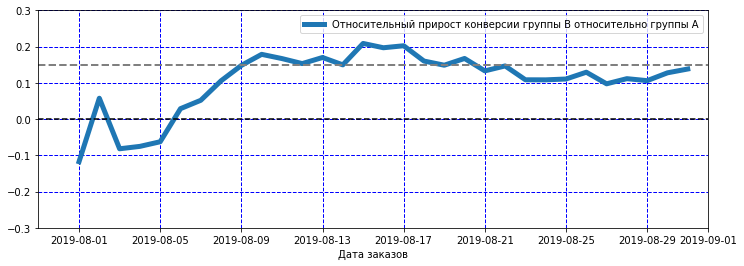

In [23]:
plt.subplots(figsize=(12, 4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions
         ['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A", linewidth = 5)
plt.legend()
plt.xlabel('Дата заказов')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--', linewidth = 2)
plt.grid(color = 'blue', linewidth = 1, linestyle = '--')
plt.axis(["2019-07-30", '2019-09-01', -0.3, 0.3]);

В начале теста группа B незначительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова немного падала, но теперь постепенно растёт. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту рано. Необходимо проанализировать аномалии, возможно, они изменят картину

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения

Найдем число заказов по пользователям — создадим датафрейм c двумя столбцами: 'userId' и 'orders'. Отсортируем по убыванию количества заказов пользователей

In [24]:
ordersByUsers = (
    df_orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Построим диаграмму распределения числа заказов по пользователям

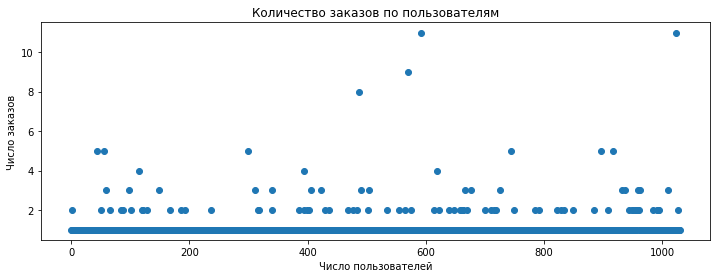

In [25]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.subplots(figsize=(12, 4))
plt.title('Количество заказов по пользователям')
plt.xlabel('Число пользователей')
plt.ylabel('Число заказов')
plt.scatter(x_values, ordersByUsers['orders']);

Большинство покупателей заказывали только один раз. 
Много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

###  Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [26]:
print('95-й и 99-й перцентили количества заказов на пользователя:', np.percentile(ordersByUsers['orders'], [97 , 99]))

95-й и 99-й перцентили количества заказов на пользователя: [2. 4.]


Не более 5% пользователей совершили более 2-х заказов, а не более 1% совершили более 4-х заказов.
Выбираем 3 заказа на одного пользователя за нижнюю границу числа заказов для того, чтобы отсеять аномальных пользователей.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения

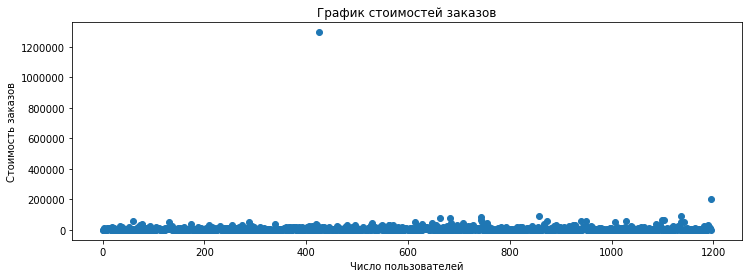

In [27]:
x_values = pd.Series(range(0,len(df_orders['revenue'])))
plt.subplots(figsize=(12, 4))
plt.title('График стоимостей заказов')
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказов')
plt.scatter(x_values, df_orders['revenue']);

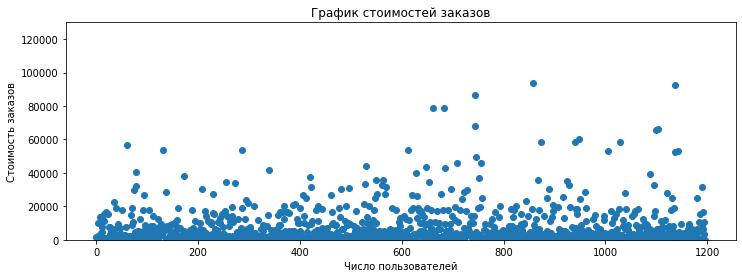

In [28]:
x_values = pd.Series(range(0,len(df_orders['revenue'])))
plt.subplots(figsize=(12, 4))
plt.ylim(0, 130000)
plt.title('График стоимостей заказов')
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказов')
plt.scatter(x_values, df_orders['revenue']);

 В наших данных присутствуют заказы более 200 тыс. и более 1200 тыс.

###  Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [29]:
np.percentile(df_orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% пользователей совершили покупку на 28 тыс. рублей и более, а не более 1% совершили покупку на 58 тыс. рублей и более.
Выбираем средний чек в 28 тыс. рублей на одного пользователя за нижнюю границу для того, чтобы отсеять аномальных пользователей.


### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения

#### Для начала подготовим данные

Создадим переменную visitorsADaily с датой и числом посещений из группы А

In [30]:
visitorsADaily = df_visitors[df_visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

Создадим переменную visitorsACummulative с датой и кумулятивным числом посещений из группы А

In [31]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

Создадим переменную visitorsBDaily с датой и числом посещений из группы В.
Создадим переменную visitorsBCummulative с датой и кумулятивным числом посещений из группы В

In [32]:
visitorsBDaily = df_visitors[df_visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Создадим переменную ordersADaily с датой, числом заказов и выручки за день из группы А

In [33]:
ordersADaily = (
    df_orders[df_orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

Создадим переменную ordersACummulative с датой, кумулятивным числом заказов и кумулятивной выручкой за день из группы А

In [34]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

Создадим переменную ordersBDaily с датой, числом заказов и выручки за день из группы В

In [35]:
ordersBDaily = (
    df_orders[df_orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

Создадим переменную ordersBCummulative с датой, кумулятивным числом заказов и кумулятивной выручкой за день из группы В

In [36]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

Объединим наши переменные в одну таблицу

In [37]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

Создадим переменные ordersByUsersA и ordersByUsersB. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

In [38]:
ordersByUsersA = (
    df_orders[df_orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

In [39]:
ordersByUsersB = (
    df_orders[df_orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1

In [40]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - 
     len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - 
     len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Определим статистически значимые различия в конверсиях между группами и относительный прирост/убыль конверсии группы B

<b>Нулевая гипотеза:</b>  
Среднее генеральной совокупности числа "сырых данных" заказов группы А и среднее генеральной совокупности числа "сырых данных" заказов группы В равны между собой.

Зададим критический уровень статистической значимости в 5% для нашей нулевой гипотезы. Сопоставим две генеральных совокупности по числу заказов за исследуемый период. Если эта вероятность низка — по наблюдаемым данным можно сделать вывод, что, скорее всего, наше предположение всё-таки неверно.

In [41]:
print('p-value:' "{0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

print('Относительный прирост конверсии группы B:'"{0:.1%}".format(sampleB.mean() / sampleA.mean() - 1))

p-value:0.0168
Относительный прирост конверсии группы B:13.8%


p-value = 0.0168 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Анализ "сырых данных" сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B равен 13.8%

###  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения

<b>Нулевая гипотеза:</b>  
Среднее генеральной совокупности "сырых данных" среднего чека заказов группы А и среднее генеральной совокупности "сырых данных" среднего чека заказов группы В равны между собой.

Зададим критический уровень статистической значимости в 5% для нашей нулевой гипотезы. Сопоставим две генеральных совокупности по среднему чеку за исследуемый период. Если эта вероятность низка — по наблюдаемым данным можно сделать вывод, что, скорее всего, наше предположение всё-таки неверно.

In [42]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(
    df_orders[df_orders['group']=='A']['revenue'], 
    df_orders[df_orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('Прирост среднего чека группы B:', '{0:.1%}'.format(
    df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Прирост среднего чека группы B: 25.9%


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
Средний чек группы B значительно больше среднего чека группы A, на 25.9%.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию

In [43]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 28000]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values(ascending=True)
)

In [44]:
print(abnormalUsers.head(5))
print('Число аномальных пользователей:', abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
Число аномальных пользователей: (74,)


Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей

In [45]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Определим статистически значимые различия в конверсиях между группами и относительный прирост/убыль конверсии группы B между очищенными данными

<b>Нулевая гипотеза:</b>  
Среднее генеральной совокупности числа "очищенных данных" заказов группы А и среднее генеральной совокупности числа "очищенных данных" заказов группы В равны между собой.

Зададим критический уровень статистической значимости в 5% для нашей нулевой гипотезы. Сопоставим две генеральных совокупности по числу заказов за исследуемый период. Если эта вероятность низка — по наблюдаемым данным можно сделать вывод, что, скорее всего, наше предположение всё-таки неверно.

In [46]:
print('p-value:', '{0:.4f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('Относительный прирост конверсии группы B:', '{0:.1%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.0130
Относительный прирост конверсии группы B: 17.3%


p-value = 0.0130 меньше 0.05. Как и в случае с сырыми данными стастическая значимость достигнута. 
Относительный прирост конверсии группы B по очищенным данным увеличился и равен 17.3%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения

<b>Нулевая гипотеза:</b>  
Среднее генеральной совокупности "очищенных данных" среднего чека заказов группы А и среднее генеральной совокупности "очищенных данных" среднего чека заказов группы В равны между собой.

Зададим критический уровень статистической значимости в 5% для нашей нулевой гипотезы. Сопоставим две генеральных совокупности по среднему чеку за исследуемый период. Если эта вероятность низка — по наблюдаемым данным можно сделать вывод, что, скорее всего, наше предположение всё-таки неверно.

In [47]:
print(
    'p-value:', '{0:.3f}'.format(
        stats.mannwhitneyu(
            df_orders[
                np.logical_and(
                    df_orders['group'] == 'A',
                    np.logical_not(df_orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            df_orders[
                np.logical_and(
                    df_orders['group'] == 'B',
                    np.logical_not(df_orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            alternative = 'two-sided'
        )[1]
    )
)

print(
    'Прирост среднего чека группы B:', '{0:.1%}'.format(
        df_orders[
            np.logical_and(
                df_orders['group'] == 'B',
                np.logical_not(df_orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / df_orders[
            np.logical_and(
                df_orders['group'] == 'A',
                np.logical_not(df_orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.738
Прирост среднего чека группы B: -2.0%


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
Средний чек группы B стал на 2% меньше среднего чека группы A

### Примем решение по результатам теста

Проанализировав А/В-тест мы получили следующие результаты:
Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
Относительный прирост конверсии группы B по очищенным данным увеличился и равен 17.3%
По сырым данным нет статистически значимого различия по среднему чеку между группами. После удаления аномалий статистически значимое различие также отсутствует.
График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.

На основании выводов теста принимаем следующее решение: остановить тест, признать его успешным и перейти к проверке следующей гипотезы. Продолжать тест смысла нет: группа B статистически значимо лучше группы A по конверсии, а график конверсии говорит о фиксации результата.

# Шаг 4. Сформулируем выводы и рекомендации

<div class="alert alert-info" role="alert">
    
Мы проанализировали данные крупного интернет-магазина. 
    
Данные представляют собой 3 датасета с информацией о гипотезах, заказах и группами A/B-теста. 

Данные первой части с информацией о гипотезах содержат:
    
— краткое описание гипотезы;
    
— охват пользователей по 10-балльной шкале;
    
— влияние на пользователей по 10-балльной шкале;
    
— уверенность в гипотезе по 10-балльной шкале;
    
— затраты ресурсов на проверку гипотезы по 10-балльной шкале.

    
Данные для второй части содержат следующую информацию:
    
Информацию о заказах:

— идентификатор заказа;
    
— идентификатор пользователя, совершившего заказ;
    
— дата, когда был совершён заказ;
    
— выручка заказа;
    
— группа A/B-теста, в которую попал заказ.
    
Информацию о посетителях:
    
— дата;
    
— группа A/B-теста;
    
— количество пользователей в указанную дату в указанной группе A/B-теста.    
    
    
в Шаге 1. Откроем файлы с данными и изучим общую информацию. 
      
в Шаге 2. Провели приоритизацию гипотез 2-мя методами:  
      
Применили фреймворк ICE для приоритизации гипотез.
    
Применили фреймворк RICE для приоритизации гипотез.
    
Определили приоритетные гипотезы.
    
Шаг 3. Проанализировали A/B-тест и построили графики:
    
Построили график кумулятивной выручки по группам. Сделали выводы и предположения.
    
Построили график кумулятивного среднего чека по группам. Сделали выводы и предположения.
    
Построили график относительного изменения кумулятивного среднего чека группы B к группе A. Сделали выводы и предположения.
    
Построили график кумулятивной конверсии по группам. Сделали выводы и предположения.
    
Построили график относительного изменения кумулятивной конверсии группы B к группе A. Сделали выводы и предположения.
    
Построили точечный график количества заказов по пользователям. Сделали выводы и предположения.
    
Посчитали 95-й и 99-й перцентили количества заказов на пользователя. Выбрали границу для определения аномальных пользователей.
    
Построили точечный график стоимостей заказов. Сделали выводы и предположения.
    
Посчитали 95-й и 99-й перцентили стоимости заказов. Выбрали границу для определения аномальных заказов.
    
Посчитали статистическую значимость различий в конверсии между группами по «сырым» данным. Сделали выводы и предположения.
    
Посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделали выводы и предположения.
    
Посчитали статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделали выводы и предположения.
    
Посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделали выводы и предположения.
    
Приняли решение по результатам теста.    
    
Шаг 3. Выводы и рекомендации   

Приоритизация гипотез:
    
В нашем распоряжнии имеется 9 гипотез, в компании принята шкала линейной оценки гипотезы от 0 до 10, где 0 — «охват гипотезы ни на кого не повлияет», а 10 — «гипотеза охватит хотя бы половину пользователей».
    
При определении перспективных гипотез методом ICE наиболее приоритетными гипотезами оказались 8, 0 и 7, при определении перспективных гипотез методом RICE наиболее приоритетными гипотезами оказались 7, 2, 0 и 6. Пипотезы 0 и 7 оказались в обоих списках, гипотеза 7 стала лидером списка RICE, а гипотеза 8 пропала из него, потому что параметр Reach (охват) у первой максимален, у второй минимален.
    
С учетом охвата аудитории приоритет проверки гипотез следует рассатривать в следующем порядке:

Гипотеза 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Гипотеза 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	

Гипотеза 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	

Гипотеза 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
    
Проанализируем результаты A/B-теста:   
Кумулятивная выручка по дням по группам - с самого начала теста сегмент В шел немного впереди а с середины резко вырвался вперед. Похоже, что аномально большие заказы влияют на результаты.

Кумулятивный средний чек по группам - средний чек тоже становится равномерным ближе к концу теста: для группы A немного возрастает и для группы B немного падает. Возможно, в группу B в первой половине теста попали крупные заказы (резкий всплеск на графике). Требуется дополнительный анализ выбросов, который искажает результаты.
    
Относительное различие кумулятивного среднего чека группы B к группе A - результаты теста значительно и резко менялись несколько раз. Возможно, тогда были совершены аномальные заказы.  
    
Кумулятивная конверсия по дням по группам - в начале теста сегмент А имел большую конверсию, но постепенно сегмент В выровнялся и зафиксировался около одного значения боьшего сегмента А.
    
Относительное изменение кумулятивной конверсии группы B к группе A - в начале теста группа B незначительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова немного падала, но теперь постепенно растёт. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту рано. Необходимо проанализировать аномалии, возможно, они изменят картину.
    
Распределение числа заказов по пользователям - Большинство покупателей заказывали только один раз. Много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. Не более 5% пользователей совершили более 2-х заказов, а не более 1% совершили более 4-х заказов. Выбираем 3 заказа на одного пользователя за нижнюю границу числа заказов для того, чтобы отсеять аномальных пользователей.
    
Стоимость заказов - в наших данных присутствуют заказы более 200 тыс. и более 1200 тыс. Не более 5% пользователей совершили покупку на 28 тыс. рублей и более, а не более 1% совершили покупку на 58 тыс. рублей и более. Выбираем средний чек в 28 тыс. рублей на одного пользователя за нижнюю границу для того, чтобы отсеять аномальных пользователей. 
    
Статистическая значимость различий в конверсии между группами по «сырым» данным - p-value = 0.0168 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Анализ "сырых данных" сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B равен 13.8%.
    
Статистическая значимость различий в среднем чеке заказа между группами по «сырым» - p-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
Средний чек группы B значительно больше среднего чека группы A, на 25.9%.  
    
Статистическая значимость различий в конверсии между группами по «очищенным» данным - p-value = 0.0130 меньше 0.05. Как и в случае с сырыми данными стастическая значимость достигнута. 
Относительный прирост конверсии группы B по очищенным данным увеличился и равен 17.3%
    
Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным - P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
Средний чек группы B стал на 2% меньше среднего чека группы A     
    
На основании выводов теста принимаем следующее решение: остановить тест, признать его успешным и перейти к проверке следующей гипотезы. Продолжать тест смысла нет: группа B статистически значимо лучше группы A по конверсии, а график конверсии говорит о фиксации результата.    
    
</div>